In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv("./NYC_Dog_Licensing_Dataset_20241125.csv")

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_61187/3589606130.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./NYC_Dog_Licensing_Dataset_20241125.csv")


In [6]:
df

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016
...,...,...,...,...,...,...,...,...
616885,SKYE,F,2016,Great Pyrenees,11218.0,11/01/2023,12/02/2024,2023
616886,UNKNOWN,F,2023,Shih Tzu Crossbreed,10022.0,11/01/2023,11/01/2024,2023
616887,MUNYU,M,2009,"Poodle, Toy",11355.0,11/01/2023,11/24/2024,2023
616888,SAINT,M,2021,Unknown,11412.0,11/01/2023,11/01/2024,2023


In [7]:
len(df)

616890

# start cleaning data

In [9]:
df.dropna(inplace=True)

In [10]:
len(df)

615392

In [17]:
df[df["AnimalName"]=="UNKNOWN"]

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
960,UNKNOWN,F,2014,Cardigan Welsh Corgi,11226.0,12/12/2014,12/12/2017,2016
1300,UNKNOWN,M,2013,"Poodle, Standard",11214.0,12/23/2014,01/14/2016,2016
1513,UNKNOWN,F,2013,Jack Russell Terrier,11231.0,01/01/2015,01/01/2016,2016
1516,UNKNOWN,F,2014,American Pit Bull Mix / Pit Bull Mix,11217.0,01/01/2015,01/01/2016,2016
1539,UNKNOWN,F,2014,Unknown,11209.0,01/02/2015,01/02/2016,2016
...,...,...,...,...,...,...,...,...
616614,UNKNOWN,F,2023,Labrador Retriever Crossbreed,11209.0,10/29/2023,10/29/2024,2023
616665,UNKNOWN,M,2022,Dachshund,11231.0,10/30/2023,11/23/2024,2023
616803,UNKNOWN,M,2023,Havanese,10003.0,11/01/2023,11/01/2024,2023
616872,UNKNOWN,F,2023,Cavalier King Charles Spaniel,10019.0,11/01/2023,10/12/2025,2023


In [25]:
#find who doesn't meet the criteria
#df[df["AnimalName"].isin(["UNKNOWN","NAME NOT PROVIDED","NAME","NONE","NOT","UNKNOWED","."])]
#~ means not. tilda??
df=df[~df["AnimalName"].isin(["UNKNOWN","NAME NOT PROVIDED","NAME","NONE","NOT","UNKNOWED","."])]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587566 entries, 0 to 616889
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AnimalName          587566 non-null  object 
 1   AnimalGender        587566 non-null  object 
 2   AnimalBirthYear     587566 non-null  object 
 3   BreedName           587566 non-null  object 
 4   ZipCode             587566 non-null  float64
 5   LicenseIssuedDate   587566 non-null  object 
 6   LicenseExpiredDate  587566 non-null  object 
 7   Extract Year        587566 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 40.3+ MB


# cleaning zipcode data

In [29]:
df["ZipCode"]=df["ZipCode"].astype(int)

/var/folders/ld/7dyzlyvx5wd6652g56np5wt40000gn/T/ipykernel_60661/3748845569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ZipCode"]=df["ZipCode"].astype(int)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587566 entries, 0 to 616889
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   AnimalName          587566 non-null  object
 1   AnimalGender        587566 non-null  object
 2   AnimalBirthYear     587566 non-null  object
 3   BreedName           587566 non-null  object
 4   ZipCode             587566 non-null  int64 
 5   LicenseIssuedDate   587566 non-null  object
 6   LicenseExpiredDate  587566 non-null  object
 7   Extract Year        587566 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 40.3+ MB


# check if the animal is born after the license issue date

In [31]:
df["LicenseIssuedDate"].str.slice(6) #just getting the year for the string

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
616884    2023
616885    2023
616887    2023
616888    2023
616889    2023
Name: LicenseIssuedDate, Length: 587566, dtype: object

In [34]:
df[df['AnimalBirthYear'].astype(str) >= df["LicenseIssuedDate"].str.slice(6)]

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016
2,ALI,M,2014,Basenji,10013,09/12/2014,09/12/2019,2016
12,LUCY,F,2014,Dachshund Smooth Coat Miniature,11215,09/13/2014,09/13/2019,2016
13,RICKY,M,2014,German Shepherd Dog,11220,09/13/2014,09/13/2017,2016
18,AVERY,F,2014,American Pit Bull Terrier/Pit Bull,10002,09/13/2014,09/13/2019,2016
...,...,...,...,...,...,...,...,...
616734,CHEDDAR,M,2023,Poodle,11361,10/31/2023,10/31/2024,2023
616743,TEDDY,M,2023,Poodle Crossbreed,11433,10/31/2023,10/31/2024,2023
616799,ANGEL,F,2023,Poodle Crossbreed,10467,11/01/2023,11/01/2024,2023
616809,BELLA,F,2023,Unknown,10455,11/01/2023,11/01/2024,2023


In [35]:
df=df[df['AnimalBirthYear'].astype(str) >= df["LicenseIssuedDate"].str.slice(6)]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68269 entries, 0 to 616813
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AnimalName          68269 non-null  object
 1   AnimalGender        68269 non-null  object
 2   AnimalBirthYear     68269 non-null  object
 3   BreedName           68269 non-null  object
 4   ZipCode             68269 non-null  int64 
 5   LicenseIssuedDate   68269 non-null  object
 6   LicenseExpiredDate  68269 non-null  object
 7   Extract Year        68269 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.7+ MB


In [38]:
df=df[df['AnimalBirthYear'] != 'ERROR: #VALUE!']

In [43]:
df['DogAge']=2024 - df["AnimalBirthYear"].astype(int)

In [44]:
df

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,DogAge
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016,10
2,ALI,M,2014,Basenji,10013,09/12/2014,09/12/2019,2016,10
12,LUCY,F,2014,Dachshund Smooth Coat Miniature,11215,09/13/2014,09/13/2019,2016,10
13,RICKY,M,2014,German Shepherd Dog,11220,09/13/2014,09/13/2017,2016,10
18,AVERY,F,2014,American Pit Bull Terrier/Pit Bull,10002,09/13/2014,09/13/2019,2016,10
...,...,...,...,...,...,...,...,...,...
616734,CHEDDAR,M,2023,Poodle,11361,10/31/2023,10/31/2024,2023,1
616743,TEDDY,M,2023,Poodle Crossbreed,11433,10/31/2023,10/31/2024,2023,1
616799,ANGEL,F,2023,Poodle Crossbreed,10467,11/01/2023,11/01/2024,2023,1
616809,BELLA,F,2023,Unknown,10455,11/01/2023,11/01/2024,2023,1


In [14]:
df['NameLength']= df['AnimalName'].str.len()

In [15]:
df

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,NameLength
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016,5.0
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016,4.0
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016,3.0
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016,5.0
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016,4.0
...,...,...,...,...,...,...,...,...,...
616885,SKYE,F,2016,Great Pyrenees,11218.0,11/01/2023,12/02/2024,2023,4.0
616886,UNKNOWN,F,2023,Shih Tzu Crossbreed,10022.0,11/01/2023,11/01/2024,2023,7.0
616887,MUNYU,M,2009,"Poodle, Toy",11355.0,11/01/2023,11/24/2024,2023,5.0
616888,SAINT,M,2021,Unknown,11412.0,11/01/2023,11/01/2024,2023,5.0


<Axes: >

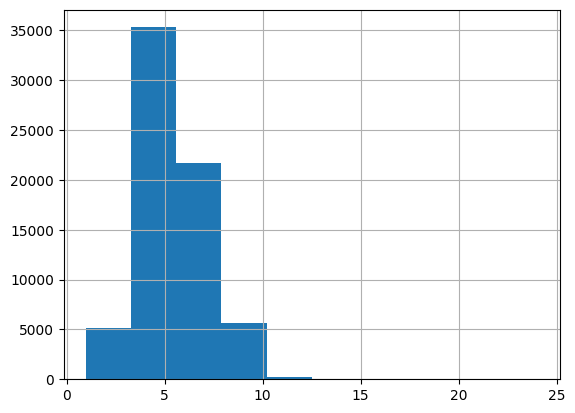

In [48]:
df["NameLength"].hist()

# interactive widgets

https://ipywidgets.readthedocs.io/en/8.1.5/examples/Widget%20List.html

support in google colab

In [19]:
from ipywidgets import interact, IntSlider,FloatSlider,Text

In [2]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
def show_square(x):
    print(x*x)

In [5]:
show_square(4)

16


In [7]:
interact(show_square,x=IntSlider(min=-1000,max=1000,step=20))

interactive(children=(IntSlider(value=0, description='x', max=1000, min=-1000, step=20), Output()), _dom_class…

<function __main__.show_square(x)>

In [10]:
interact(show_square,x=FloatSlider(min=0,max=1,step=0.01))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.show_square(x)>

<Axes: ylabel='BreedName'>

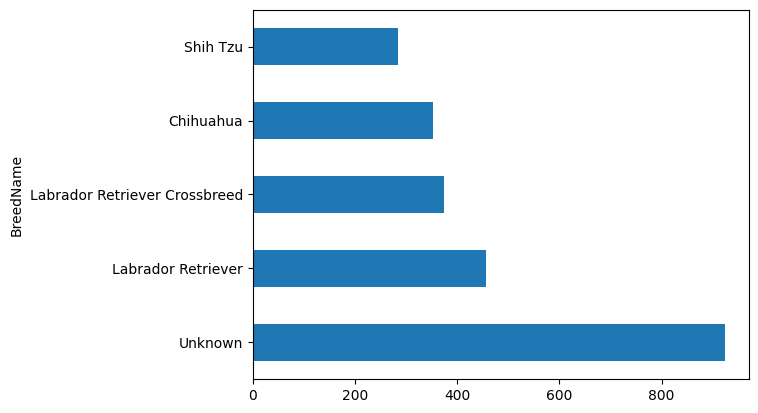

In [16]:
df[df["ZipCode"]==11201]["BreedName"].value_counts()[:5].plot(kind="barh")

In [36]:
def popular_breeds_by_zip(zipcode):
    df[df["ZipCode"] == int(zipcode)]["BreedName"].value_counts()[:5].plot(kind="barh")

In [38]:
interact(popular_breeds_by_zip,zipcode=Text())

interactive(children=(Text(value='', description='zipcode'), Output()), _dom_classes=('widget-interact',))

<function __main__.popular_breeds_by_zip(zipcode)>

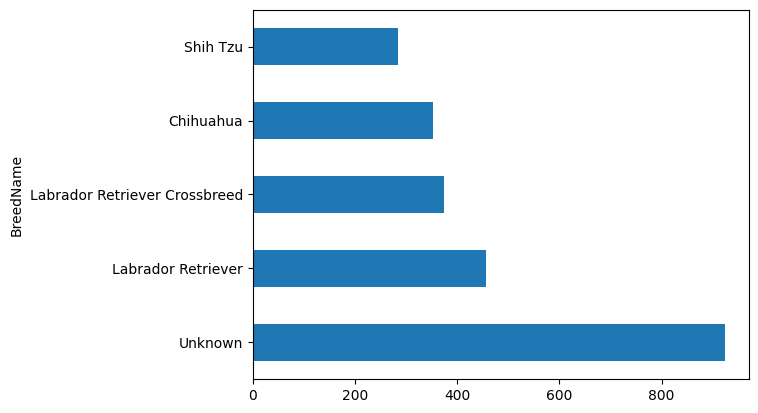

In [18]:
popular_breeds_by_zip(11221)

# pygwalker

https://github.com/Kanaries/pygwalker

In [39]:
%pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pygwalker as pyg

In [42]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-000627c6b18177f7Xuajmle8oPQJsEc3" style="height: auto">\n    <hea…